In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bikedata/SeoulBikeData.csv


# Motivation

In this machine learning problem, I will be using regression with the Seoul Bike Sharing data set in order to predict bike count required to provide a stable supply of rental bikes. Rental bikes have become an important form of public transportation in many major cities. Machine learning can help us predict the amount of bikes needed in order to lessen wait times for the public. This data set includes weather information(Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), date information, and the number of bikes rented per hour. This is a good machine learning problem because it saves time, money, and predicts future outcomes using past data. 

# Exploratory Analysis

**Importing Necessary Libraries:**

In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet, LinearRegression
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Importing the Data

In [3]:
bikedata = pd.read_csv('/kaggle/input/bikedata/SeoulBikeData.csv', encoding='utf-8', encoding_errors='ignore')

In [4]:
bikedata

,Date,Rented Bike Count,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


There are 14 features and 8760 observations in this dataset. 

**Preprocessing & Train Test Split:**

In [5]:
X = bikedata.drop('Rented Bike Count', axis=1) 
y = bikedata['Rented Bike Count']

In [6]:
X

,Date,Hour,Temperature(C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,30/11/2018,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,30/11/2018,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,30/11/2018,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,30/11/2018,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes


Converting the date column into separate columns for year, month, day, day of the week, and weekend: 

In [7]:
X['Date'] = pd.to_datetime(X['Date'], format='%d/%m/%Y')

In [8]:
X['year'] = X['Date'].dt.year
X['month'] = X['Date'].dt.month
X['day'] = X['Date'].dt.day
X['dayofweek'] = X['Date'].dt.dayofweek  # Monday = 0, Sunday = 6
X['is_weekend'] = (X['dayofweek'] >= 5).astype(int)

Dropping the original date column:

In [9]:
X = X.drop(['Date'], axis = 1)

Train Test Split:

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Distribution of target variable:**

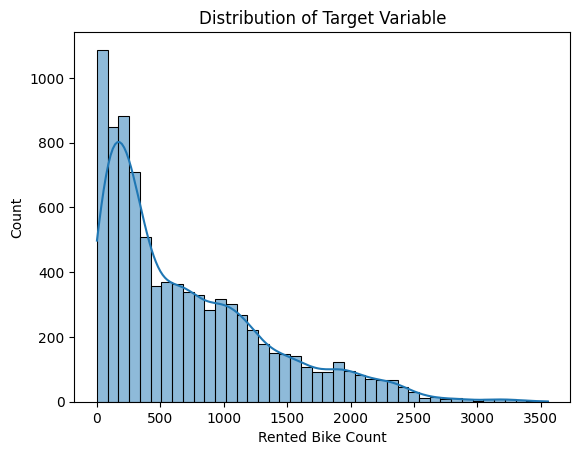

In [11]:
sns.histplot(y, kde=True) 
plt.title('Distribution of Target Variable')
plt.show()

The distribution of the target variable is not normal or uniform, but is heavily right-skewed, with a peak from 0-100, and decay as values get larger. 

**Checking data types:**

In [12]:
X.dtypes

Hour                          int64
Temperature(C)              float64
Humidity(%)                   int64
Wind speed (m/s)            float64
Visibility (10m)              int64
Dew point temperature(C)    float64
Solar Radiation (MJ/m2)     float64
Rainfall(mm)                float64
Snowfall (cm)               float64
Seasons                      object
Holiday                      object
Functioning Day              object
year                          int32
month                         int32
day                           int32
dayofweek                     int32
is_weekend                    int64
dtype: object

The Season, Holiday, and Functioning Day variables are categorical. The Hour, Temperature, Humidity, Wind Speed, Visibility, Dew Point Temperature, Solar Radiation, Rainfall, and Snowfall variables are numeric. The date values are numeric, but I am treating day of week and month as categorical. 

**Checking missing values:**

In [13]:
X.isnull().sum()

Hour                        0
Temperature(C)              0
Humidity(%)                 0
Wind speed (m/s)            0
Visibility (10m)            0
Dew point temperature(C)    0
Solar Radiation (MJ/m2)     0
Rainfall(mm)                0
Snowfall (cm)               0
Seasons                     0
Holiday                     0
Functioning Day             0
year                        0
month                       0
day                         0
dayofweek                   0
is_weekend                  0
dtype: int64

In [14]:
y.isnull().sum()

0

There are no missing values in this dataset. 

**Checking for outliers:**

In [15]:
numeric_cols = X.drop(['Seasons', 'Holiday', 'Functioning Day', 'dayofweek', 'month'], axis =1)

outlier_summary = {}

for col in numeric_cols.columns:
    Q1 = np.percentile(X[col].dropna(), 25)
    Q3 = np.percentile(X[col].dropna(), 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Find outliers
    outliers = X[(X[col] < lower_bound) | (X[col] > upper_bound)][col]
    
    outlier_summary[col] = {
        'num_outliers': outliers.count(),
        'percent_outliers': 100 * outliers.count() / X[col].dropna().count()
    }

outlier_df = pd.DataFrame(outlier_summary).T
outlier_df = outlier_df.sort_values(by='percent_outliers', ascending=False)

print(outlier_df)

                          num_outliers  percent_outliers
year                             744.0          8.493151
Solar Radiation (MJ/m2)          641.0          7.317352
Rainfall(mm)                     528.0          6.027397
Snowfall (cm)                    443.0          5.057078
Wind speed (m/s)                 161.0          1.837900
Hour                               0.0          0.000000
Temperature(C)                     0.0          0.000000
Humidity(%)                        0.0          0.000000
Visibility (10m)                   0.0          0.000000
Dew point temperature(C)           0.0          0.000000
day                                0.0          0.000000
is_weekend                         0.0          0.000000


While there are some outliers in this dataset, I'm choosing to keep them due to the fact that they are natural events. Storms happen, and play a role in outcomes, so I don't think it would significantly impact my results negatively. 

# Evalution Metric

I'm choosing to use RMSE as my evaluation metric, because it is a reliable and standard metric for regression. It also punishes underpredictions more than overpredictions, which is ideal when looking at bike counts. It would be better to have extra bikes than too few bikes. 

# Model Fitting

# Elastic Net Regression

In [16]:
categorical_cols = ['Seasons', 'Holiday', 'Functioning Day', 'dayofweek', 'month']
X_train_dummies = pd.get_dummies(X_train, columns=categorical_cols, drop_first=True)
X_test_dummies = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

In [17]:
all_columns = X_train_dummies.columns.union(X_test_dummies.columns)

# Reindex both dataframes to include all columns
X_train_dummies = X_train_dummies.reindex(columns=all_columns, fill_value=0)
X_test_dummies = X_test_dummies.reindex(columns=all_columns, fill_value=0)

In [18]:
assert set(X_train.columns) == set(X_test.columns)

In [19]:
# Set up cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

In [20]:
# ElasticNet Regression with GridSearchCV
alphas = np.logspace(-4, 4, 9)
l1_ratios = np.linspace(0, 1, 10)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('elasticnet', ElasticNet())
])

param_grid = {
    'elasticnet__alpha': alphas,
    'elasticnet__l1_ratio': l1_ratios
}
elasticnet_cv = GridSearchCV(
    pipeline, 
    param_grid,
    cv=kf,
    scoring='neg_root_mean_squared_error',
    return_train_score=True  # Also track training scores
)
elasticnet_cv.fit(X_train_dummies, y_train)
best_alpha = elasticnet_cv.best_params_['elasticnet__alpha']
best_l1_ratio = elasticnet_cv.best_params_['elasticnet__l1_ratio']
best_score = -elasticnet_cv.best_score_  
best_model = elasticnet_cv.best_estimator_

In [21]:
print(f"Best alpha: {best_alpha}, Best l1 ratio: {best_l1_ratio}, RMSE: {best_score}")

Best alpha: 0.01, Best l1 ratio: 0.2222222222222222, RMSE: 410.6993779160868


In [22]:
elastic_predictions = best_model.predict(X_test_dummies)
elastic = pd.DataFrame({
    'Rented Bike Count': elastic_predictions
})

In [23]:
elastic

,Rented Bike Count
0,772.230691
1,1089.382756
2,1129.833001
3,1414.806272
4,559.440039
...,...
1747,407.004086
1748,156.386131
1749,845.725215
1750,-155.707018


# PCA Regression

In [24]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_dummies)

In [25]:
pca = PCA()

In [26]:
pca.fit(X_train_scaled)

PCA()

In [27]:
X_pca = pca.transform(X_train_scaled)

In [28]:
X_pca

array([[ 3.04866781e-03, -5.73437098e-01, -3.60783379e-01, ...,
         8.53070317e-16,  1.79869789e-15, -1.18779084e-16],
       [-2.55258972e+00,  1.51999453e+00,  9.15336612e-01, ...,
        -3.40419434e-16,  7.78680485e-16,  6.49703416e-16],
       [ 3.18348612e-01, -3.53714227e-01,  3.10227975e-01, ...,
         1.68573759e-15,  2.23410498e-17, -3.40823689e-16],
       ...,
       [-2.79908047e+00,  1.27675903e+00, -1.69738141e+00, ...,
        -1.50615361e-15,  1.27828085e-15,  3.90807521e-17],
       [ 2.06166736e+00,  2.00136251e-01, -4.25962496e-01, ...,
        -2.33882088e-15,  6.12147032e-16, -5.99297487e-16],
       [-6.93727182e-01,  2.56027010e-01, -3.77503843e-01, ...,
        -3.51081026e-17, -8.31142900e-16,  7.60725718e-16]])

In [29]:
pipeline = Pipeline([
    ('pca', PCA()),
    ('regressor', LinearRegression())
])

In [30]:
param_grid = {
    'pca__n_components': [i+1 for i in range(X_train.shape[1])]
}

In [31]:
grid_search = GridSearchCV(
    pipeline,
    param_grid=param_grid,
    cv=5,
    scoring= 'neg_root_mean_squared_error',
    n_jobs=-1  # Use all available processors
)

# Fit the grid search
grid_search.fit(X_train_dummies, y_train)

# Get best parameters and score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Best cross-validation RMSE score: {- grid_search.best_score_}")


Best parameters: {'pca__n_components': 17}
Best cross-validation RMSE score: 465.56006268737093


In [32]:
best_pca_model = grid_search.best_estimator_
pca_predictions = best_model.predict(X_test_dummies)
pca = pd.DataFrame({
    'Rented Bike Count': pca_predictions
})

In [33]:
pca

,Rented Bike Count
0,772.230691
1,1089.382756
2,1129.833001
3,1414.806272
4,559.440039
...,...
1747,407.004086
1748,156.386131
1749,845.725215
1750,-155.707018


# Random Forest Regression

In [34]:
X_train_dummies.shape[1]

34

In [35]:
X_train_dummies.shape[1] ** 0.5

5.830951894845301

In [36]:
np.log2(X_train_dummies.shape[1])

5.087462841250339

In [37]:
rfr = RandomForestRegressor()
param_grid_rf = {
    'n_estimators': [300, 400, 500],
    'max_depth': [15, 20, 25],
    'max_features': [20, 30, 40]
}

grid_search_rf = GridSearchCV(
    estimator = rfr,
    param_grid = param_grid_rf,
    cv = 3,
    scoring = 'neg_root_mean_squared_error',
    n_jobs = -1
)

grid_search_rf.fit(X_train_dummies, y_train)

print(grid_search_rf.best_params_)
print(f"Best cross-validation RMSE score: {- grid_search_rf.best_score_}")

{'max_depth': 20, 'max_features': 30, 'n_estimators': 500}
Best cross-validation RMSE score: 179.66614516697905


In [38]:
best_rf_model = grid_search_rf.best_estimator_
rf_predictions = best_rf_model.predict(X_test_dummies)
rf = pd.DataFrame({
    'Rented Bike Count': rf_predictions
})

In [39]:
rf

,Rented Bike Count
0,1725.712169
1,726.294139
2,678.204817
3,2301.816704
4,800.114067
...,...
1747,206.700440
1748,62.997000
1749,237.067663
1750,317.304150


# Model Comparison

The Random Forest model resulted in the best RMSE, followed by Elastic Net, then PCA. Elastic Net and PCA regression tend to be less flexible and avoid overfitting, with high bias and low variance. Random Forest has lower bias and higher variance. The Elastic Net model is the most interpretable. In this case, accuracy is more important than interpretibility, so Random Forest is the best option. The Random Forest RMSE is also half that of the other two models, so it performed considerably better. 